In [1]:
#importing the Libraies

import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)
input=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
output=dataset[['charges']]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.30,random_state=0)

In [5]:
from sklearn.tree import DecisionTreeRegressor

#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_features='sqrt') #--> 0.71
#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_features='log2') #--> 0.70
#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='random',max_features='sqrt') #--> 0.68
#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='random',max_features='log2') #--> 0.58
regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_features='sqrt') #--> 0.75
#regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='best',max_features='log2') #--> 0.73
#regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',max_features='sqrt') #--> 0.62
#regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',max_features='log2') #--> 0.71
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_features='sqrt') #--> 0.74
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_features='log2') #--> 0.70
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='sqrt') #--> 0.71
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2') #--> 0.73
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='best',max_features='sqrt') #--> 0.64
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='best',max_features='log2') #--> 0.70
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='sqrt') #--> 0.63
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='log2') #--> 0.66

#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='best') #--> 0.68
#regressor=DecisionTreeRegressor(criterion='squared_error',splitter='random') #--> 0.72
#regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='best') #--> 0.71
#regressor=DecisionTreeRegressor(criterion='friedman_mse',splitter='random') #--> 0.71
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='best') #--> 0.69
#regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='random') #--> 0.72
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='best') #--> 0.72
#regressor=DecisionTreeRegressor(criterion='poisson',splitter='random') #--> 0.69

#regressor=DecisionTreeRegressor(criterion='squared_error') #--> 0.69
#regressor=DecisionTreeRegressor(criterion='friedman_mse') #--> 0.68
#regressor=DecisionTreeRegressor(criterion='absolute_error') #--> 0.66
#regressor=DecisionTreeRegressor(criterion='poisson') #--> 0.72

regressor=regressor.fit(x_train,y_train)

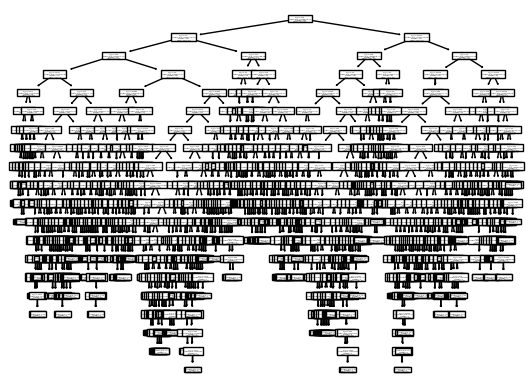

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [7]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.5983567639811198